In [65]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier, BaggingClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import r2_score, accuracy_score, confusion_matrix

In [42]:
data = pd.read_csv("D:\DataSets\Predictive Analysis_ML\Brest_Cancer_Data.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [43]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [44]:
data.shape

(569, 33)

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [46]:
data.drop(columns=["id","Unnamed: 32"], inplace=True)

In [47]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [48]:
data.duplicated().sum()

0

In [49]:
data["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [50]:
le = LabelEncoder()
data["diagnosis"] = le.fit_transform(data["diagnosis"])
data.sample(4)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
383,0,12.390,17.48,80.64,462.9,0.10420,0.12970,0.05892,0.02880,0.1779,...,14.18,23.13,95.23,600.5,0.1427,0.35930,0.32060,0.09804,0.2819,0.11180
53,1,18.220,18.70,120.30,1033.0,0.11480,0.14850,0.17720,0.10600,0.2092,...,20.60,24.13,135.10,1321.0,0.1280,0.22970,0.26230,0.13250,0.3021,0.07987
289,0,11.370,18.89,72.17,396.0,0.08713,0.05008,0.02399,0.02173,0.2013,...,12.36,26.14,79.29,459.3,0.1118,0.09708,0.07529,0.06203,0.3267,0.06994
66,0,9.465,21.01,60.11,269.4,0.10440,0.07773,0.02172,0.01504,0.1717,...,10.41,31.56,67.03,330.7,0.1548,0.16640,0.09412,0.06517,0.2878,0.09211


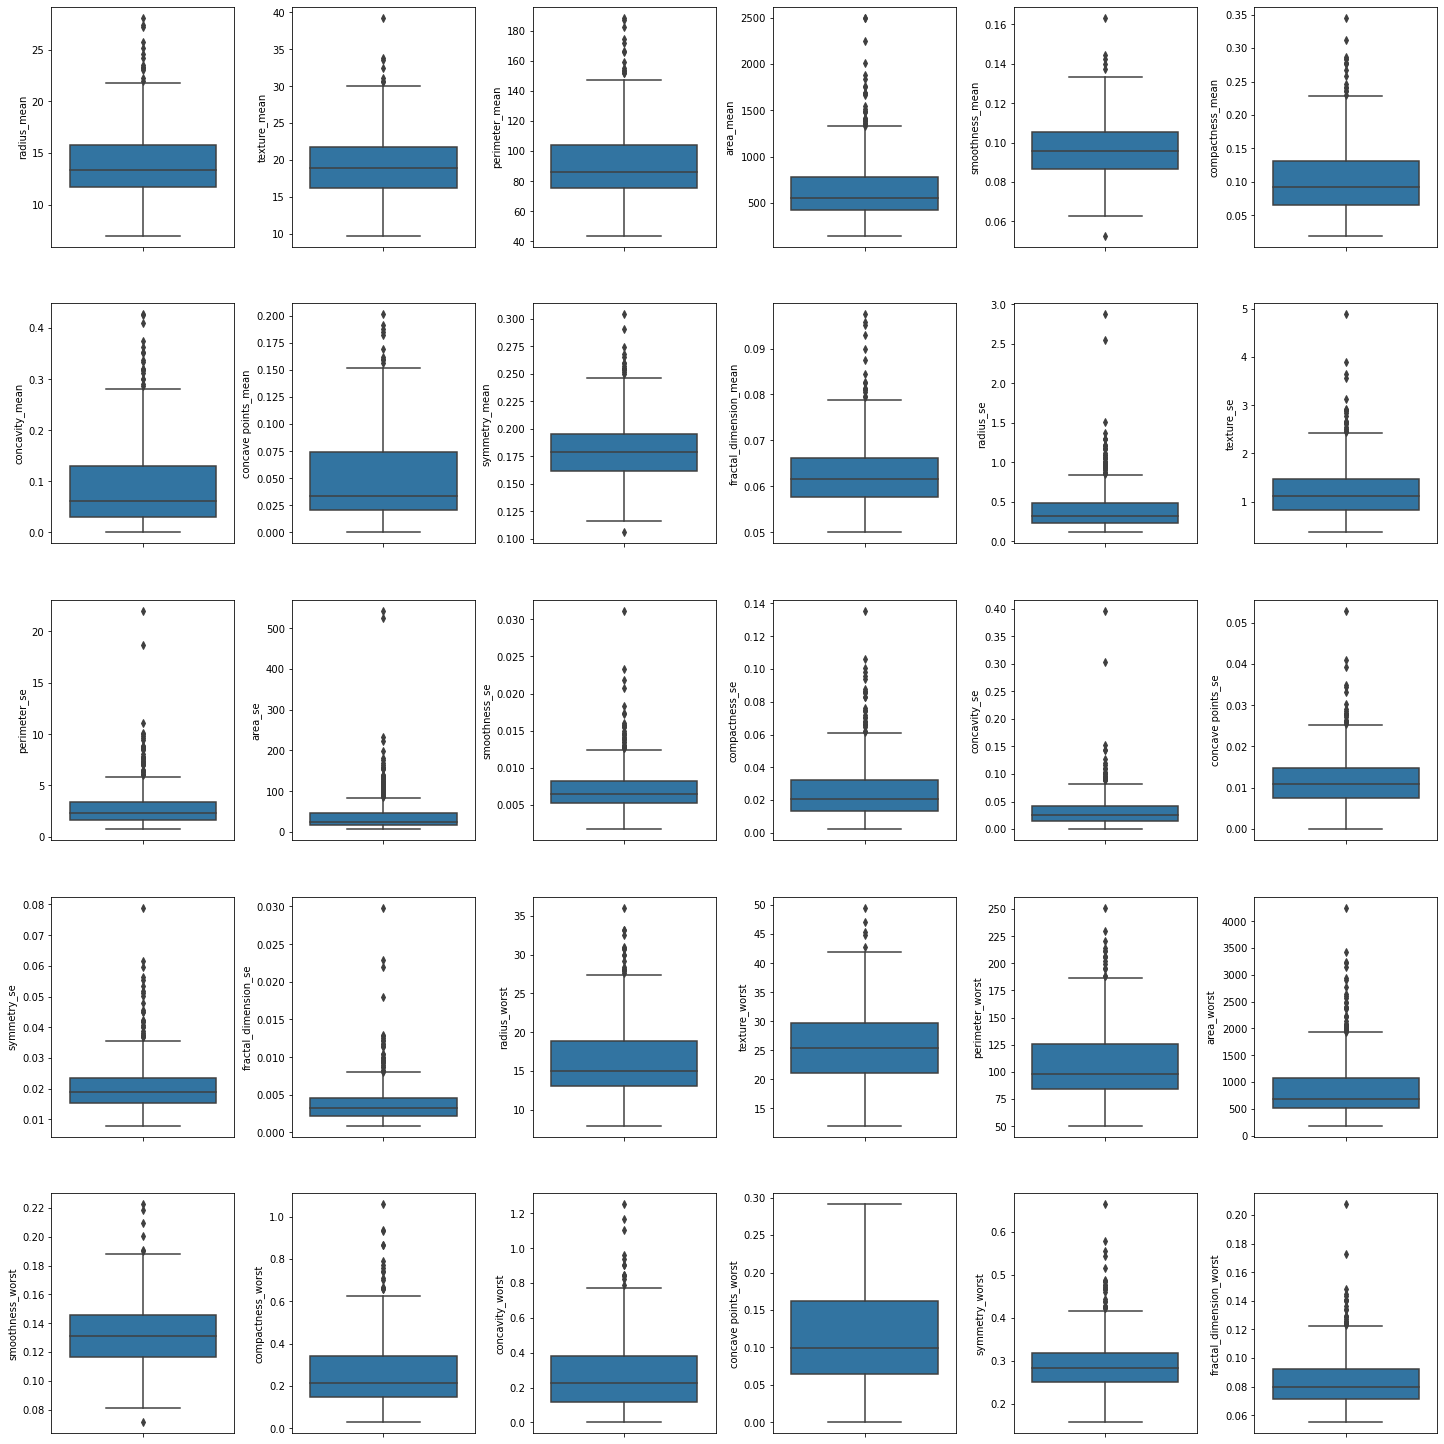

In [51]:
data1 = data.drop(columns=['diagnosis'], axis=1)

fig, ax = plt.subplots(ncols=6, nrows=5, figsize=(20, 20))
index = 0
ax = ax.flatten()

for col in data1.columns:
    sns.boxplot(y=col, data=data1, ax=ax[index])
    index+=1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [52]:
data["texture_mean"] = data[(data["texture_mean"] < data["texture_mean"].mean() + 3 * data["texture_mean"].std()) & (data["texture_mean"] > data["texture_mean"].mean() - 3 * data["texture_mean"].std())] 
data["radius_mean"] = data[(data["radius_mean"] < data["radius_mean"].mean() + 3 * data["radius_mean"].std()) & (data["radius_mean"] > data["radius_mean"].mean() - 3 * data["radius_mean"].std())] 
data["perimeter_mean"] = data[(data["perimeter_mean"] < data["perimeter_mean"].mean() + 3 * data["perimeter_mean"].std()) & (data["perimeter_mean"] > data["perimeter_mean"].mean() - 3 * data["perimeter_mean"].std())] 

In [53]:
data.isnull().sum()*100

diagnosis                    0
radius_mean                500
texture_mean               400
perimeter_mean             700
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
dtype: int64

In [54]:
data.dropna(inplace=True)

In [55]:
data.shape

(558, 31)

In [56]:
mms = MinMaxScaler()
data_scaled = mms.fit_transform(data)
data = pd.DataFrame(data_scaled, columns=data.columns)
data.sample(4)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
232,0.0,0.0,0.0,0.0,0.299595,0.267220,0.259248,0.258677,0.241799,0.142424,...,0.318404,0.811611,0.318418,0.178268,0.243875,0.208895,0.244728,0.282440,0.064065,0.150335
262,0.0,0.0,0.0,0.0,0.305020,0.105263,0.022606,0.017003,0.034284,0.226263,...,0.284202,0.245589,0.269148,0.153813,0.095754,0.022383,0.030879,0.114536,0.176030,0.040404
228,0.0,0.0,0.0,0.0,0.084877,0.288977,0.065916,0.038743,0.091443,0.247980,...,0.105049,0.203187,0.093710,0.046415,0.523212,0.065838,0.057196,0.248179,0.234969,0.175390
85,1.0,1.0,1.0,1.0,0.314749,0.377449,0.245660,0.282364,0.270872,0.512626,...,0.337134,0.490324,0.354484,0.192097,0.392459,0.165236,0.267492,0.420962,0.286813,0.088023


In [66]:
x = data.drop(columns="diagnosis")
y = data["diagnosis"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=None)

In [75]:
smote = SMOTE(sampling_strategy="minority")
x_train_sm, y_train_sm = smote.fit_resample(x_train,y_train)
y_train_sm.value_counts()

0.0    295
1.0    295
Name: diagnosis, dtype: int64

In [69]:
lor = LogisticRegression()

In [70]:
dt = DecisionTreeClassifier()

In [71]:
bc = BaggingClassifier()

In [72]:
rf = RandomForestClassifier()

In [73]:
estimators = [("lr",lor), ("dt",dt), ("rf",rf)]

vc = VotingClassifier(estimators=estimators)

In [74]:
models = [("lr",lor), ("dt",dt), ("vc",vc), ("bc",bc), ("rf",rf)]
for i in models:
    var = i[1]
    var.fit(x_train_sm,y_train_sm)
    pred = var.predict(x_test)
    print("accuracy_score of", i[0], ": ", accuracy_score(y_test, pred)*100)

accuracy_score of lr :  100.0
accuracy_score of dt :  100.0
accuracy_score of vc :  100.0
accuracy_score of bc :  100.0
accuracy_score of rf :  100.0
